In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals
#
import tensorflow as tf
#import keras.backend.tensorflow_backend as KTF
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for device in gpu_devices:
    tf.config.experimental.set_memory_growth(device,True)



In [ ]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
 
# The GPU id to use, usually either "0" or "1";
os.environ["CUDA_VISIBLE_DEVICES"]="1";  

In [3]:
import torch
print(torch.__version__)
print(K.tensorflow_backend._get_available_gpus())

1.3.1


AttributeError: module 'tensorflow_core.keras.backend' has no attribute 'tensorflow_backend'

In [113]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import keras.layers as layers
import keras
from keras.models import Model
from keras.layers import Input, LSTM, Dense
from keras.models import Sequential, Input, Model
from keras.layers import (Dense, Conv1D, Convolution2D, GRU, LSTM, Recurrent, Bidirectional, TimeDistributed,
                          Dropout, Flatten, RepeatVector, Reshape, MaxPooling1D, UpSampling1D, BatchNormalization)
from keras.layers.core import Lambda
from keras.optimizers import Adam
from keras.regularizers import l1
from keras.models import load_model
from sklearn import preprocessing
from keras.models import load_model
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn import linear_model
import pandas as pd
import torch
import torch.nn as nn
import random
#from keras import layers as layers
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from scipy import special
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import tensorflow as tf
import tensorflow.keras.backend as K
from keras.callbacks import ModelCheckpoint

In [114]:
def s_1(b1, b2, Vbot, C1, D1):
    s1 = (b1+b2)/2 + ((b2-b1)/2)*special.erfc((Vbot-C1)/D1)
    return s1
    
def s_2(b3, b4, Vbot, C2, D2):
    s2 = (b3+b4)/2 + ((b4-b3)/2)*special.erfc((Vbot-C2)/D2)
    return s2

def s_3(b5, b6, Vbot, C3, D3):
    s3 = (b5+b6)/2 + ((b6-b5)/2)*special.erfc((Vbot-C3)/D3)
    return s3

def s_4(b7, b8, Vtop, C4, D4):
    s4 = (b7+b8)/2 + ((b8-b7)/2)*special.erfc((Vtop-C4)/D4)
    return s4

def s_5(b9, b10, Vtop, C5, D5):
    s5 = (b9+b10)/2 + ((b10-b9)/2)*special.erfc((Vtop-C5)/D5)
    return s5

def s_6(b11, b12, Vtop, C6, D6):
    s6 = (b11+b12)/2 + ((b12-b11)/2)*special.erfc((Vtop-C6)/D6)
    return s6

In [115]:
def F_1(a1, a2, a3, a4, a7,Al1, Al2, Al3, s1, s2, s3, Vbot):
    F1 = a1+(a1-a2)*(special.erfc((Vbot+Al1)/s1)+1)/2 + (a2-a3)*(special.erfc((Vbot+Al2)/s2)+1)/2 + (a3-a4)*(special.erfc((Vbot+Al3)/s3)+1)/2 + a7*Vtop
    return F1

def F_2(a1, a5, a6, a4, a7, Au1, Au2, Au3, s4, s5, s6, Vtop):
    F2 = a1+(a1-a5)*(special.erfc((Vtop+Au1)/s4)+1)/2 + (a5-a6)*(special.erfc((Vtop+Au2)/s5)+1)/2 + (a6-a4)*(special.erfc((Vtop+Au3)/s6)+1)/2 + a7*Vtop
    return F2

In [116]:
Vbot = np.linspace(-15,15,96)
Vtop = np.linspace(-15,15,96)
a1 = -5
a2 = 3
a3 = 12
a4 = 15
a5 = 2
a6 = 10
a7 = 0.01
b1 = 1
b2 = 1
b3 = 1
b4 = 1
b5 = 1
b6 = 1
b7 = 1
b8 = 1
b9 = 1
b10= 1
b11= 1
b12= 1
Al1= 3
Al2= -2
Al3= -6
Au1= -8
Au2= -4
Au3= 0
C1 = -1
C2 = -1
C3 = -1
C4 = 6
C5 = 6
C6 = 6
D1 = 1
D2 = 1
D3 = 1
D4 = 1
D5 = 1
D6 = 1

In [117]:
s1 = s_1(b1, b2, Vbot, C1, D1)
s2 = s_2(b3, b4, Vbot, C2, D2)
s3 = s_3(b5, b6, Vbot, C3, D3)
s4 = s_4(b7, b8, Vtop, C4, D4)
s5 = s_5(b9, b10, Vtop, C5, D5)
s6 = s_6(b11, b12, Vtop, C6, D6)

In [118]:
F1 = F_1(a1, a2, a3, a4, a7, Al1, Al2, Al3, s1, s2, s3, Vbot)
F2 = F_2(a1, a5, a6, a4, a7, Au1, Au2, Au3, s4, s5, s6, Vtop)


In [120]:
F1 = np.asarray(F1)
F2 = np.asarray(F2)
F4 = F2[0:47]
F3 = F2[48:95]
F5 = np.flip(F1)
F6 = np.concatenate((F3,F5,F4),axis=None)

In [127]:
F1.shape

(96,)

In [147]:
F6

array([-32.05668197, -31.25257948, -30.65261992, -30.28386314,
       -30.09589376, -30.01224302, -29.96516892, -29.89421019,
       -29.72243988, -29.3408584 , -28.63391183, -27.55429041,
       -26.19786068, -24.79645853, -23.60591028, -22.77399826,
       -22.29524422, -22.06664271, -21.97035109, -21.91537853,
       -21.82903446, -21.6282493 , -21.2088805 , -20.48055342,
       -19.43842786, -18.21180617, -17.02453598, -16.07947788,
       -15.46054722, -15.12654198, -14.97729786, -14.92113176,
       -14.90216857, -14.89513849, -14.89120117, -14.88791439,
       -14.88473899, -14.88157914, -14.87842107, -14.87526316,
       -14.87210526, -14.86894737, -14.86578947, -14.86263158,
       -14.85947368, -14.85631579, -14.85315789, -14.85      ,
       -14.85315789, -14.85631579, -14.85947368, -14.86263158,
       -14.86578947, -14.86894737, -14.87210526, -14.87526316,
       -14.87842105, -14.88157895, -14.88473684, -14.88789474,
       -14.89105263, -14.89421053, -14.89736842, -14.90

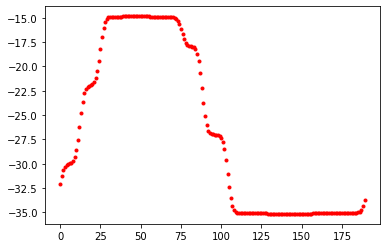

In [148]:
plt.plot(F6,'r.')

In [174]:
a = [1,2,3,4,6]
a = np.asarray(a)
b=a[0:2]
b

array([1, 2])

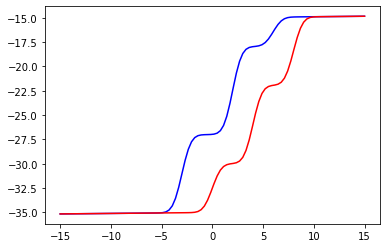

In [121]:
plt.plot(Vbot,F1,'b')
plt.plot(Vtop,F2,'r')

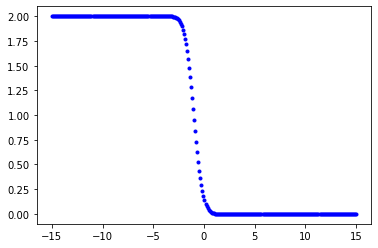

In [83]:
plt.plot(Vtop,special.erfc((Vbot-C1)/D1),'b.')

In [32]:
date = {'dfsa':100,'dfsad':200}

In [47]:
for key,value in date.items():
    print (key,value)

dfsa 100
dfsad 200


In [158]:
Vbot = np.linspace(-15,15,96)
Vtop = np.linspace(-15,15,96)
F6 = []

for k in range(1000):
    a1 = np.random.uniform(-6,-4,1)
    a2 = np.random.uniform(2,4,1)
    a3 = np.random.uniform(11,13,1)
    a4 = np.random.uniform(14,16,1)
    a5 = np.random.uniform(1,3,1)
    a6 = np.random.uniform(9,11,1)
    a7 = np.random.uniform(0,1,1)
    b1 = np.random.uniform(1,1,1)
    b2 = np.random.uniform(1,1,1)
    b3 = np.random.uniform(1,1,1)
    b4 = np.random.uniform(1,1,1)
    b5 = np.random.uniform(1,1,1)
    b6 = np.random.uniform(1,1,1)
    b7 = np.random.uniform(1,1,1)
    b8 = np.random.uniform(1,1,1)
    b9 = np.random.uniform(1,1,1)
    b10= np.random.uniform(1,1,1)
    b11= np.random.uniform(1,1,1)
    b12= np.random.uniform(1,1,1)
    Al1= np.random.uniform(2,4,1)
    Al2= np.random.uniform(-3,-1,1)
    Al3= np.random.uniform(-7,-5,1)
    Au1= np.random.uniform(-9,-7,1)
    Au2= np.random.uniform(-5,-3,1)
    Au3= np.random.uniform(-1,1,1)
    C1 = np.random.uniform(-2,0,1)
    C2 = np.random.uniform(-2,0,1)
    C3 = np.random.uniform(-2,0,1)
    C4 = np.random.uniform(5,7,1)
    C5 = np.random.uniform(5,7,1)
    C6 = np.random.uniform(5,7,1)
    D1 = np.random.uniform(0,2,1)
    D2 = np.random.uniform(0,2,1)
    D3 = np.random.uniform(0,2,1)
    D4 = np.random.uniform(0,2,1)
    D5 = np.random.uniform(0,2,1)
    D6 = np.random.uniform(0,2,1)
    
    s1 = s_1(b1, b2, Vbot, C1, D1)
    s2 = s_2(b3, b4, Vbot, C2, D2)
    s3 = s_3(b5, b6, Vbot, C3, D3)
    s4 = s_4(b7, b8, Vtop, C4, D4)
    s5 = s_5(b9, b10, Vtop, C5, D5)
    s6 = s_6(b11, b12, Vtop, C6, D6)
    
    F1 = F_1(a1, a2, a3, a4, a7, Al1, Al2, Al3, s1, s2, s3, Vbot)
    F2 = F_2(a1, a5, a6, a4, a7, Au1, Au2, Au3, s4, s5, s6, Vtop)
    
    
    F1 = np.asarray(F1)
    F2 = np.asarray(F2)
    F4 = F2[0:48]
    F3 = F2[48:9]
    F5 = np.flip(F1)
    F6_ = np.concatenate((F3,F5,F4),axis=None)
    F6.append(F6_)
    
    
    
    
    


In [159]:
F6 = np.asarray(F6)
F6.shape

(1000, 190)

ValueError: low >= high

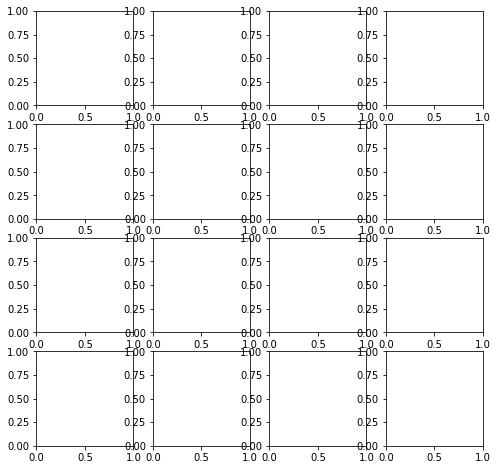

In [154]:
fig, axs = plt.subplots(4, 4, figsize=(8, 8))
axs.reshape(-1)
for i in range (0,4):
    for j in range(0,4):
        k = np.random.randint(0, F6.shape[0])
        ax = axs[i,j]
        ax.plot(F6[k],'r-')
       
        

In [93]:
F1.shape

(1000, 300)

In [ ]:
def encode_identity_block(X, stage, block, size, n_step, drop_frac, l2_norm):
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'enconde' + str(stage) + block + '_branch'
    
    X_shortcut = X
    X = layers.Bidirectional(LSTM(size, return_sequences=True, dropout=drop_frac,
                             activity_regularizer=l2(l2_norm)),input_shape=(n_step, 1))(X)
    
   # X = layers.BatchNormalization(axis = 1, name = bn_name_base + '2a')(X)
    X = layers.Activation('relu')(X)
    
    X = layers.Bidirectional(LSTM(size, return_sequences=True, dropout=drop_frac,
                             activity_regularizer=l2(l2_norm)),input_shape=(n_step, 1))(X)
    
   # X = layers.BatchNormalization(axis = 1, name = bn_name_base + '2b')(X)
    X = layers.Activation('relu')(X)
    
    X = layers.Bidirectional(LSTM(size, return_sequences=True, dropout=drop_frac,
                             activity_regularizer=l2(l2_norm)),input_shape=(n_step, 1))(X)
    
   # X = layers.BatchNormalization(axis = 1, name = bn_name_base + '2c')(X)
    
    X = layers.add([X, X_shortcut])
    X = layers.Activation('relu')(X)
    
    return X

In [ ]:
def decode_identity_block(X, stage, block, size, n_step, drop_frac, l2_norm):
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'decode' + str(stage) + block + '_branch'
    
    X_shortcut = X
    X = layers.Bidirectional(LSTM(size, return_sequences=True, dropout=drop_frac, 
                             activity_regularizer=l2(l2_norm)))(X)
    #X = layers.BatchNormalization(axis = 1, name = bn_name_base + '2a')(X)
    X = layers.Activation('relu')(X)
    
    X = layers.Bidirectional(LSTM(size, return_sequences=True, dropout=drop_frac, 
                             activity_regularizer=l2(l2_norm)))(X)
    
    #X = layers.BatchNormalization(axis = 1, name = bn_name_base + '2b')(X)
    X = layers.Activation('relu')(X)
    
    X = layers.Bidirectional(LSTM(size, return_sequences=True, dropout=drop_frac, 
                             activity_regularizer=l2(l2_norm)))(X)
    #X = layers.BatchNormalization(axis = 1, name = bn_name_base + '2c')(X)
    
    X = layers.add([X, X_shortcut])
    X = layers.Activation('relu')(X)
    
    return X

In [ ]:
def ResNet50(lr=3e-5, size=256, drop_frac=0, n_step=50, embedding = 64, l2_norm = 1e-4):

    X_input = layers.Input(shape=(50,1))
    X = X_input

    X = encode_identity_block(X, 2, 'b', size, n_step, drop_frac, l2_norm)
    X = encode_identity_block(X, 2, 'c', size, n_step, drop_frac, l2_norm)
    X = encode_identity_block(X, 2, 'd', size, n_step, drop_frac, l2_norm)

    X = layers.Bidirectional(LSTM(size, return_sequences=False, dropout=drop_frac,
                             activity_regularizer=l2(l2_norm)),input_shape=(n_step, 1))(X)
    #X = layers.BatchNormalization(axis=1, name='last_encode')(X)
    X = layers.Activation('relu')(X)
    X = layers.Dense(embedding,activation='relu',name='embedding_layer',activity_regularizer=l2(l2_norm))(X)
    X = layers.RepeatVector(n_step)(X)
    
    X = layers.Bidirectional(LSTM(size, return_sequences=True, dropout=drop_frac, 
                             activity_regularizer=l2(l2_norm)))(X)
    
    #X = layers.BatchNormalization(axis = 1, name = 'fires_decode')(X)
    X = layers.Activation('relu')(X)

    X = decode_identity_block(X, 2, 'b', size, n_step, drop_frac, l2_norm)
    X = decode_identity_block(X, 2, 'c', size, n_step, drop_frac, l2_norm)
    X = decode_identity_block(X, 2, 'd', size, n_step, drop_frac, l2_norm)
    
    X = layers.BatchNormalization(axis = 1, name = 'batch_normal')(X)
    X = layers.TimeDistributed(Dense(1, activation='linear'))(X)
    model = Model(inputs=X_input, outputs=X, name='ResNet50')
    model.compile(Adam(lr), loss='mse')

    return model